In [6]:
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

In [89]:
#EDA

#load the spectograms dataset
path1 = '../Data/images_original/'
subfolders = os.listdir(path1)
subfolders.remove('.DS_Store')
print(subfolders)
data = []

music_genre = {
    'pop' : 1,
    'metal' : 2,
    'disco' : 3,
    'blues' : 4,
    'reggae' : 5,
    'classical' : 6,
    'rock' : 7,
    'hiphop' : 8,
    'country' : 9,
    'jazz' : 10
}

#obtain the genre value from the folder name
def get_genre(folder_name):
    return music_genre[folder_name]

def get_genre_from_value(genre_value):
    for genre, value in music_genre.items():
        if value == genre_value:
            return genre
    return None  # Return None if the value is not found

for folder in subfolders:
    path2 = os.path.join(path1,folder)
    print(path2)
    files = os.listdir(path2)
    #print(files)
    for file in files:
            img_path = os.path.join(path2,file)
            #print(img_path)
            #print('Image path: ',img_path)
            #Open the image file
            img = Image.open(img_path)
            # Convert the image to RGB if it has an alpha channel (transparency)
            if img.mode == 'RGBA':
                img = img.convert('RGB')
            #display(img)        
            #print(img) 
            #converting an image to an ndarray
            img = np.array(img)
            genre = get_genre(folder)
            data.append({'image':img,'genre':genre})

    # print(subpath)
    # img = cv2.imread(subpath)
    # cv2.imshow('image',img)
    # cv2.waitkey(0)
    # cv2.destroyAllWindows()



['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']
../Data/images_original/pop
../Data/images_original/metal
../Data/images_original/disco
../Data/images_original/blues
../Data/images_original/reggae
../Data/images_original/classical
../Data/images_original/rock
../Data/images_original/hiphop
../Data/images_original/country
../Data/images_original/jazz


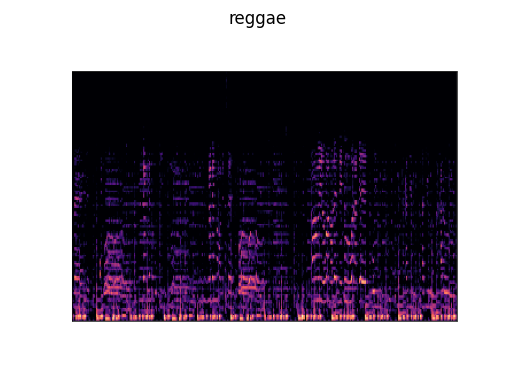

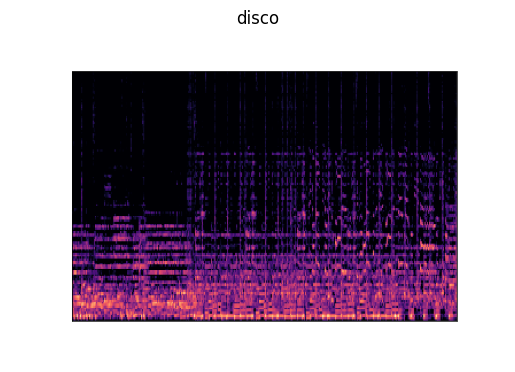

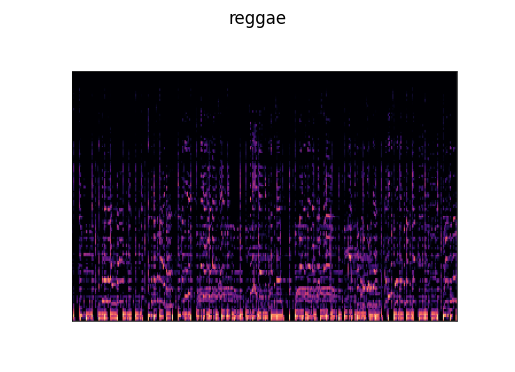

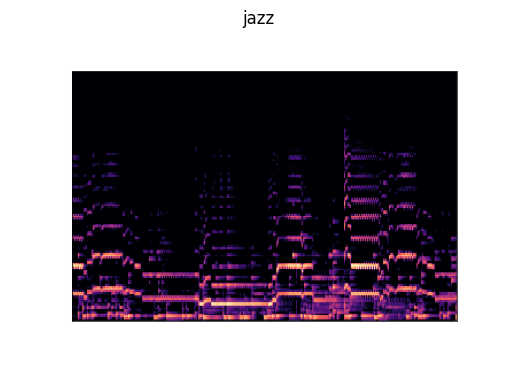

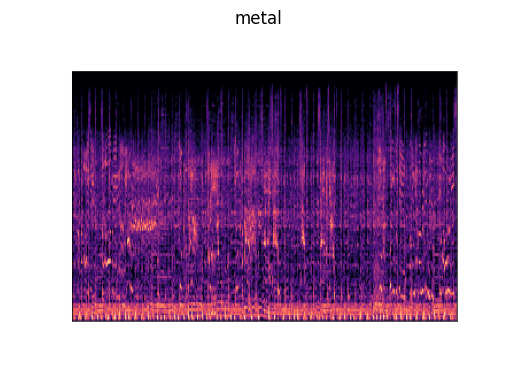

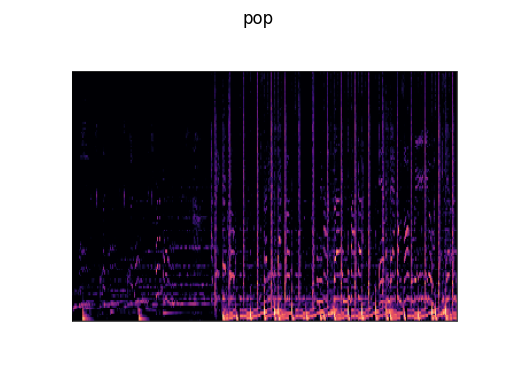

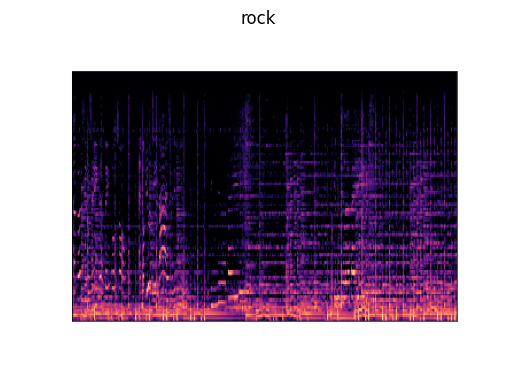

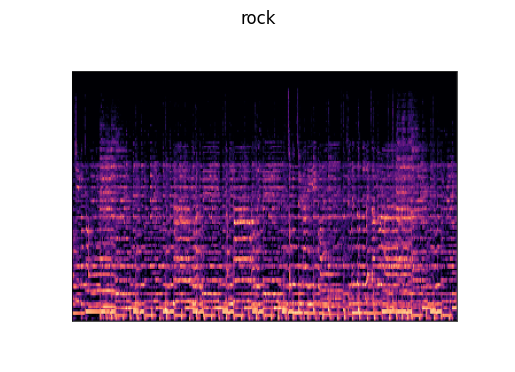

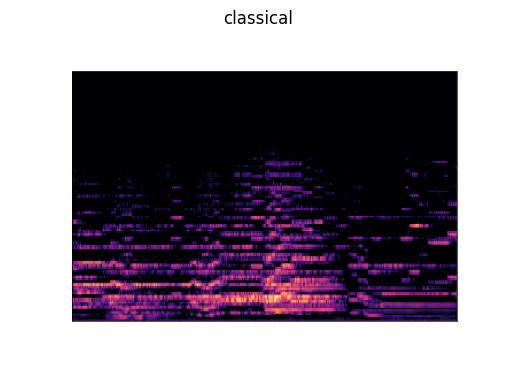

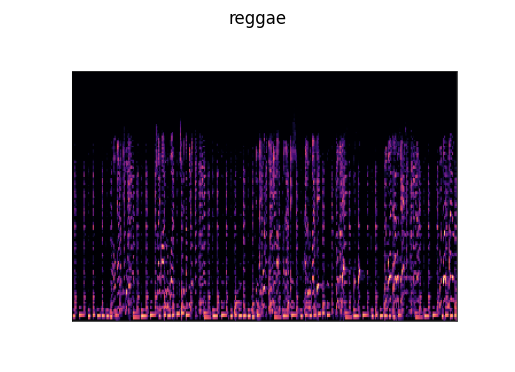

In [90]:
# dataset has been loaded and now i want to display random images from it
# We have performed EDA
for i in range(len(music_genre)):
    index = random.randint(0, len(data))
    img = data[index]['image'] 
    genre_value = data[index]['genre']
    genre_key = get_genre_from_value(genre_value)
    #print("Music Genre: ",genre_key)
    plt.imshow(img)
    plt.axis('off')
    plt.title(genre_key)
    plt.show()
    #display(img)
    #print("Music Genre: ",data[0]['genre'])



In [98]:
# Extract 'image' and 'genre' from 'data'
image_data = [item['image'] for item in data]

image_array_rgb = image_data[0]

# Reshape the 3D array to 2D (flattening along the first axis)
flat_image_array = image_array_rgb.reshape(-1, image_array_rgb.shape[-1])

# Convert the 2D array into a DataFrame
df = pd.DataFrame(flat_image_array)

# Save the DataFrame to a CSV file
df.to_csv('image_data_rgb.csv', index=False, header=False)  # header=False to omit column headers

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_image_from_csv(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, header=None)

    # Convert DataFrame to NumPy array
    image_array_flat = df.values.astype(np.uint8)

    # Get the image width based on the total number of pixels
    image_width = int(np.sqrt(image_array_flat.shape[0] / 3))  # Assuming an RGB image

    # Reshape the flat array back to the original 3D array (assuming an RGB image)
    image_array_rgb = image_array_flat.reshape(288, 342, 3)

    return image_array_rgb

def display_image_from_csv(file_path):
    # Read the image from the CSV file
    image_array_restored = read_image_from_csv(file_path)

    # Display the image
    plt.imshow(image_array_restored)
    plt.axis('off')  # Hide axis ticks and labels
    plt.title('Restored Image from CSV')
    plt.show()

# Usage:
display_image_from_csv('image_data_rgb.csv')


ValueError: cannot reshape array of size 373248 into shape (288,342,3)

In [82]:
# # Specify the file name for the CSV
# file_name = 'data.csv'
# headers = ['image', 'genre']

# # Write data to the CSV file
# with open(file_name, 'w', newline='') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=headers)
#     writer.writeheader()  # Write header row with column names
#     for item in data:
#         writer.writerow(item)

# print(f"Data has been saved to '{file_name}'")

In [83]:
# import ast

# # Function to convert string back to np.array
# def convert_string_to_array(string):
#     arr_string = string.strip('[]')  # Remove brackets from the string
#     elements = arr_string.split(',')  # Split string elements
#     arr = np.array(elements, dtype=np.uint8)  # Convert elements to numpy array
#     return arr

# temp = pd.read_csv('data1.csv')
# tempX = temp['image']
# tempY = temp['genre']

# # Example string representation of image data (Replace this with your actual string data)
# string_data = tempX[0]
# img = convert_string_to_array(string_data)

# plt.imshow(img)
# plt.show()


In [84]:
X = np.array([item['image'] for item in data])#images in numpy.ndarray form
y = np.array([item['genre'] for item in data])#labels in int form

# Print shapes to verify
print("X shape:", X.shape)# (999, 288, 432, 3)
print("y shape:", y.shape)# (999,)


X shape: (999, 288, 432, 3)
y shape: (999,)


In [61]:
from sklearn.model_selection import train_test_split

# Assuming you have X (images) and y (genres) arrays

# Splitting the data into a temporary train and test set (85% - 15%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Calculating the validation set size based on the total number of samples
validation_ratio = 0.10
validation_size = int((len(X_temp) * validation_ratio) / (1 - 0.15))  # Adjusted based on the remaining 85%

# Further splitting the temporary train set into train and validation sets (75% - 10%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=validation_size, random_state=42)

# Printing the shapes to verify
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)


X_train shape: (750, 288, 432, 3)
X_val shape: (99, 288, 432, 3)
X_test shape: (150, 288, 432, 3)


In [64]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming you have X_train, y_train, X_val, y_val, X_test, y_test containing your data

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

image_height = 288
image_width = 432
num_channels = 3

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')  # Output layer with 11 classes (genres)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
24/24 [==============================] - 78s 3s/step - loss: 2.3734 - accuracy: 0.0920 - val_loss: 2.3371 - val_accuracy: 0.0808
Epoch 2/10
24/24 [==============================] - 71s 3s/step - loss: 2.3318 - accuracy: 0.1067 - val_loss: 2.3292 - val_accuracy: 0.0808
Epoch 3/10
24/24 [==============================] - 71s 3s/step - loss: 2.3184 - accuracy: 0.1040 - val_loss: 2.3190 - val_accuracy: 0.1010
Epoch 4/10
24/24 [==============================] - 72s 3s/step - loss: 2.3141 - accuracy: 0.0880 - val_loss: 2.3147 - val_accuracy: 0.0808
Epoch 5/10
24/24 [==============================] - 71s 3s/step - loss: 2.3175 - accuracy: 0.0947 - val_loss: 2.3187 - val_accuracy: 0.1010
Epoch 6/10
24/24 [==============================] - 73s 3s/step - loss: 2.3101 - accuracy: 0.0907 - val_loss: 2.3161 - val_accuracy: 0.0909
Epoch 7/10
24/24 [==============================] - 73s 3s/step - loss: 2.3161 - accuracy: 0.0853 - val_loss: 2.3178 - val_accuracy: 0.0909
Epoch 8/10
24/24 [==

In [65]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

# Define the input shape based on your image dimensions
input_shape = (288, 432, 3)  # Assuming image_height = 288, image_width = 432, num_channels = 3

# Load the pre-trained VGG16 model without the top (fully connected) layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional layers to prevent them from being trained again
for layer in vgg_base.layers:
    layer.trainable = False

# Create your own classification layers
model = models.Sequential()
model.add(vgg_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Adding dropout for regularization
model.add(layers.Dense(11, activation='softmax'))  # Output layer with 11 classes (genres)

# Compile the model
model.compile(optimizer=optimizers.Adam(lr=0.0001),  # Adjust the learning rate if needed
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


58889256/58889256 [==============================] - 62s 1us/step


Epoch 1/10
24/24 [==============================] - 344s 14s/step - loss: 3.5512 - accuracy: 0.1067 - val_loss: 2.3954 - val_accuracy: 0.0909
Epoch 2/10
 5/24 [=====>........................] - ETA: 4:17 - loss: 2.3953 - accuracy: 0.1312

KeyboardInterrupt: 